In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [8]:
df.shape

(28242, 7)

In [13]:
df.isnull()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
28237,False,False,False,False,False,False,False
28238,False,False,False,False,False,False,False
28239,False,False,False,False,False,False,False
28240,False,False,False,False,False,False,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [17]:
df.duplicated().sum()

2310

In [19]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [23]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [25]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [27]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [29]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [31]:
df=df.drop(to_drop)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


<Axes: xlabel='count', ylabel='Area'>

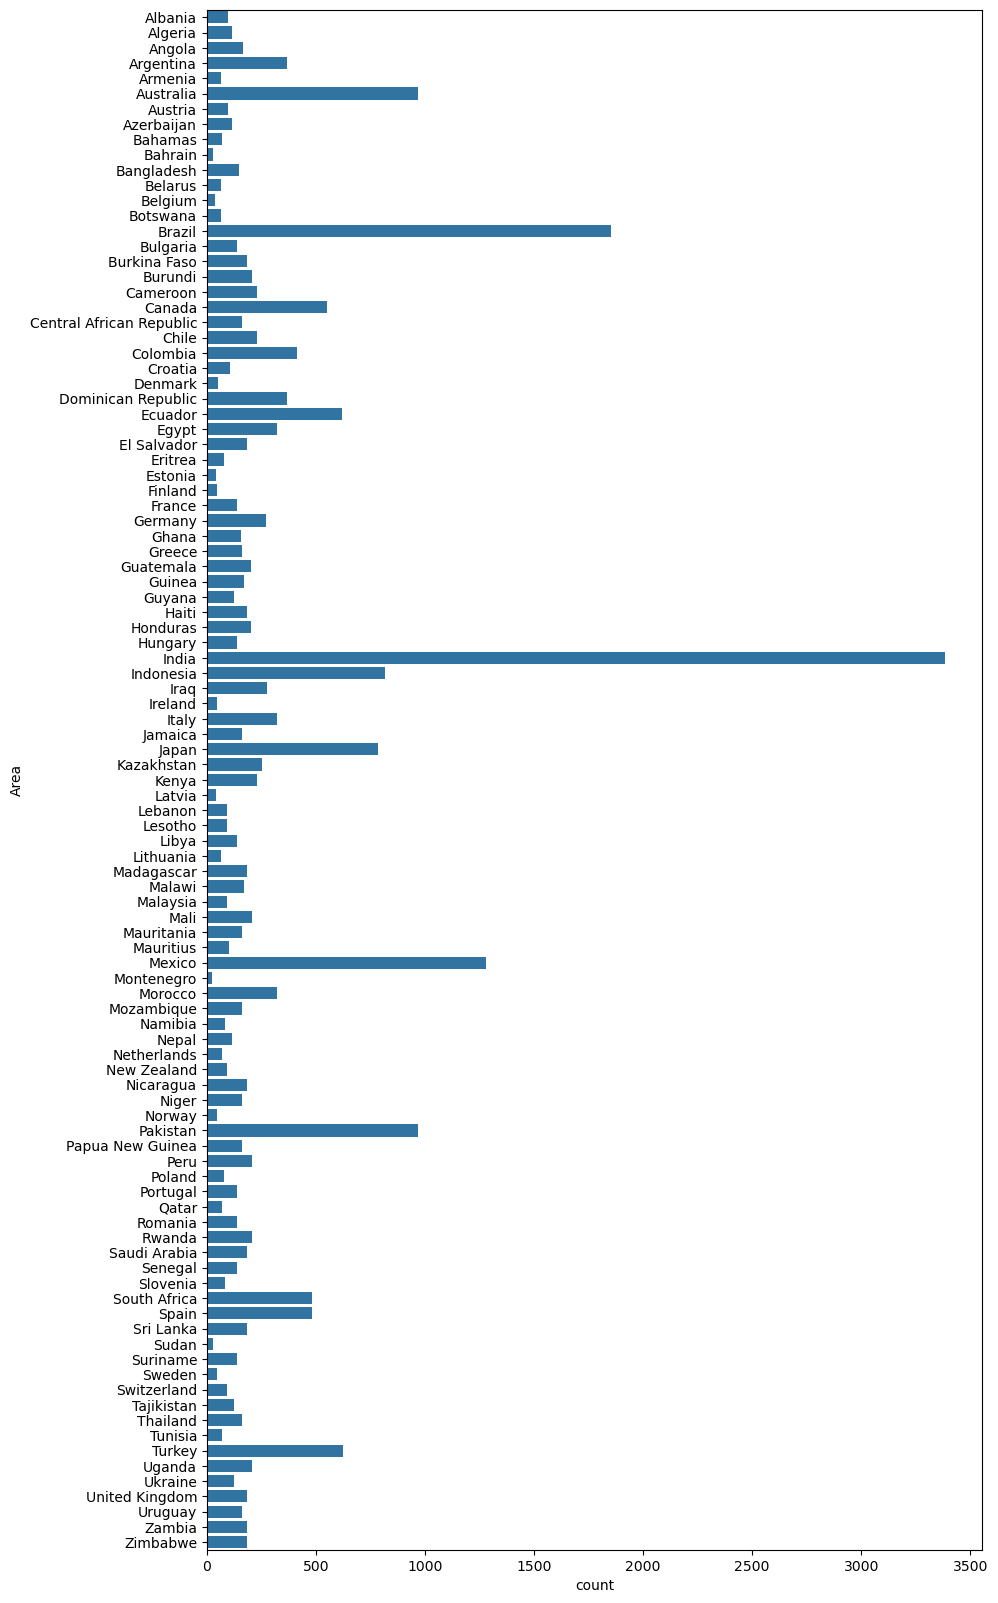

In [33]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

In [34]:
country=(df['Area'].unique())
country

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [35]:
yield_per_country=[]
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [36]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

<Axes: >

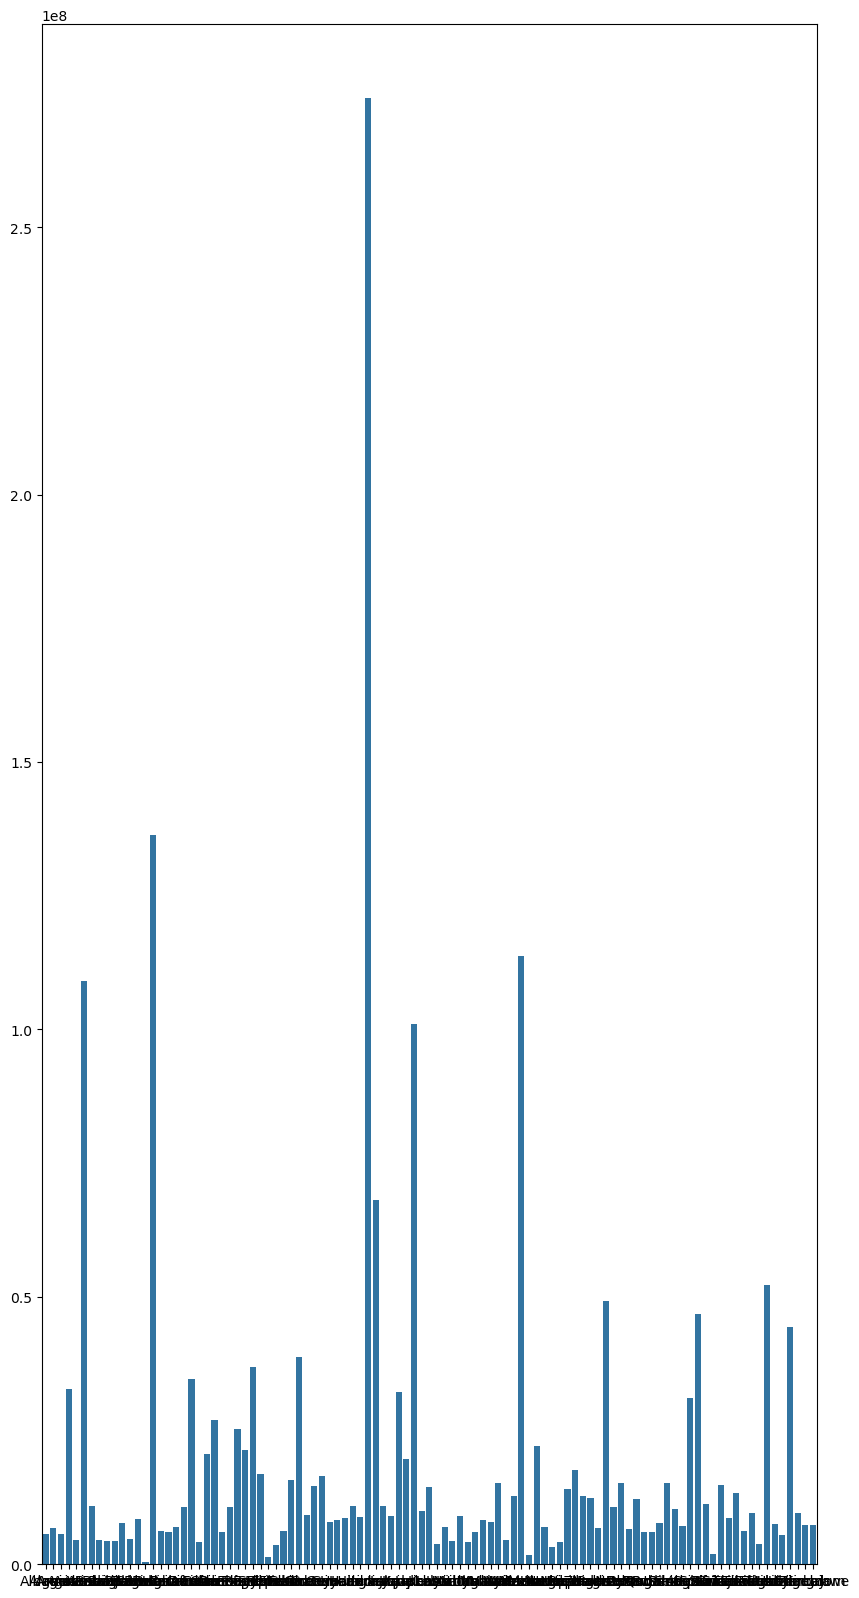

In [39]:
plt.figure(figsize=(10,20))
sns.barplot(x=country,y=yield_per_country)

In [42]:
df['Item']

0                 Maize
1              Potatoes
2           Rice, paddy
3               Sorghum
4              Soybeans
              ...      
28237       Rice, paddy
28238           Sorghum
28239          Soybeans
28240    Sweet potatoes
28241             Wheat
Name: Item, Length: 25932, dtype: object

<Axes: xlabel='count', ylabel='Item'>

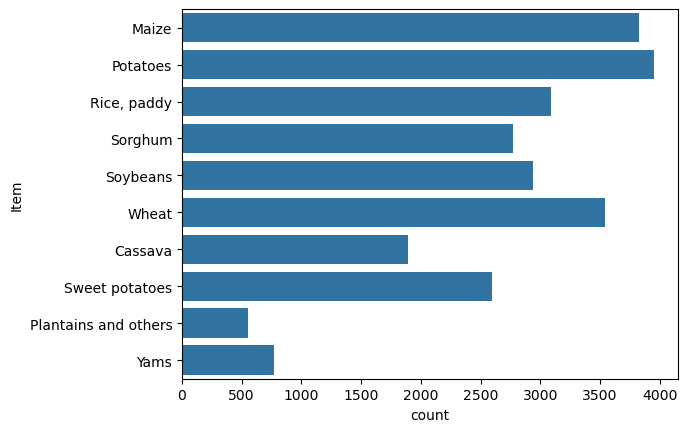

In [43]:
sns.countplot(y=df['Item'])

In [44]:
crops=(df['Item'].unique())

In [49]:
yield_per_item=[]
for crop in crops:
    yield_per_item.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

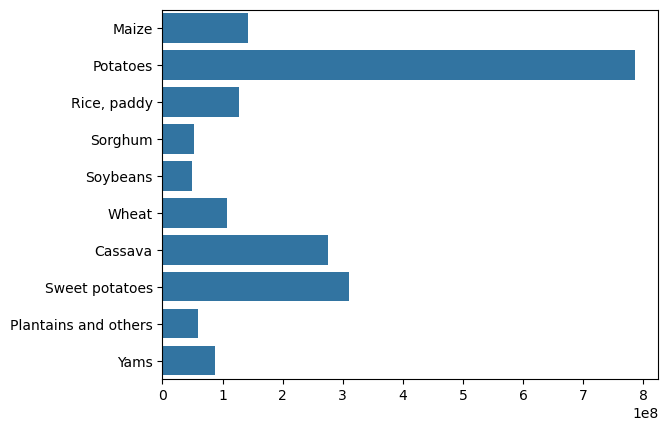

In [51]:
sns.barplot(y=crops,x=yield_per_item)

In [53]:
col=['Area','Item','Year','average_rain_fall_mm_per_year','pesticides_tonnes',	'avg_temp','hg/ha_yield']
df=df[col]
df

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485.0,121.00,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.00,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.00,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657.0,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657.0,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657.0,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657.0,2550.07,19.76,22222


In [102]:
from sklearn.model_selection import train_test_split

X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
x_train.shape

(18152, 6)

In [106]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [108]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first'), ['Area', 'Item']),  # Categorical
        ('scaler', StandardScaler(), [                            # Numerical only
            'Year',
            'average_rain_fall_mm_per_year',
            'pesticides_tonnes',
            'avg_temp'
        ])
    ],
    remainder='passthrough'
)

In [110]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(drop='first'),
                                 ['Area', 'Item']),
                                ('scaler', StandardScaler(),
                                 ['Year', 'average_rain_fall_mm_per_year',
                                  'pesticides_tonnes', 'avg_temp'])])

In [112]:
print(x_train.columns.tolist())

['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item']


In [114]:
print(x_train.dtypes)

Year                               int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
Area                              object
Item                              object
dtype: object


In [116]:
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [118]:
x_train_transformed

<18152x113 sparse matrix of type '<class 'numpy.float64'>'
	with 107512 stored elements in Compressed Sparse Row format>

In [124]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(x_train_transformed,y_train)
    y_pred = md.predict(x_test_transformed)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 30222.43964656726 score : 0.7494173512408966


C:\Users\RUSHABH\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54683513089.73828, tolerance: 12694335560.961731
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 30207.853818189382 score : 0.7493394001835775
Rid : mae : 30163.913316795788 score : 0.7492575577252447
Dtr : mae : 4420.043444730077 score : 0.9759659388256088


In [128]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_transformed,y_train)
dtr.predict(x_test_transformed)

array([117628.,  15838.,  72614., ...,  58596.,   1341.,  19466.])

In [138]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Correct column order as per preprocessor
    features = pd.DataFrame([{
        'Area': Area,
        'Item': Item,
        'Year': Year,
        'average_rain_fall_mm_per_year': average_rain_fall_mm_per_year,
        'pesticides_tonnes': pesticides_tonnes,
        'avg_temp': avg_temp
    }])

    # Transform the features
    transformed_features = preprocessor.transform(features)

    # Predict
    predicted_yield = dtr.predict(transformed_features)

    return predicted_yield[0]
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)


In [140]:
result

36613.0